**OPEN ENDED ASSIGNMENT**

BY

HARSHALI BORHADE

UEC2022016


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sl

In [ ]:
df=pd.read_csv('/content/Crop_recommendation.csv')
print(df)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


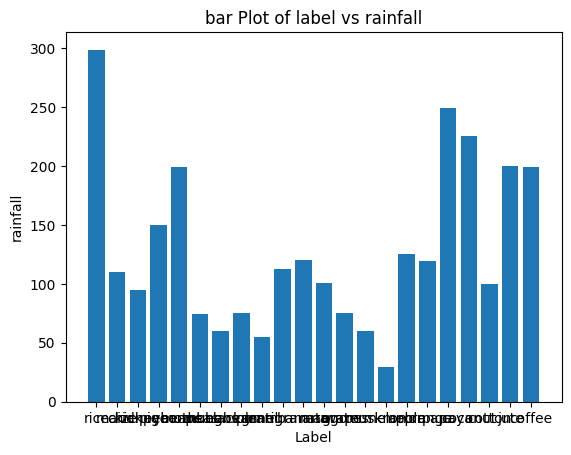

In [ ]:
plt.bar(df.label, df.rainfall)
plt.xlabel('Label')
plt.ylabel('rainfall')
plt.title('bar Plot of label vs rainfall')
plt.show()

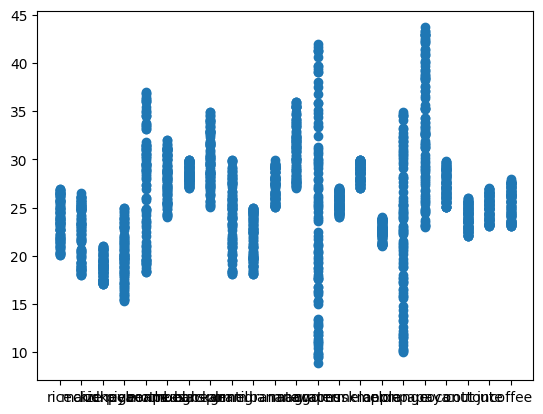

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.label,df.temperature)
plt.show()

**Split the data**

In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:7]
y=df.iloc[:,7]
print(x)
print(y)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
print(xtrain,xtest,ytrain,ytest)


        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object
 

**Build Logistic Regression Model using training data**

In [ ]:
from sklearn.linear_model import LogisticRegression
mymodel=LogisticRegression()
mymodel.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Testing the model**

In [ ]:
ypred=mymodel.predict(xtest)
print(ypred)
y1=mymodel.predict_proba(xtest)
print(y1)

['chickpea' 'jute' 'orange' 'grapes' 'apple' 'coffee' 'chickpea' 'maize'
 'coffee' 'cotton' 'mango' 'banana' 'blackgram' 'coffee' 'grapes'
 'coconut' 'jute' 'kidneybeans' 'lentil' 'orange' 'lentil' 'apple' 'mango'
 'pomegranate' 'mothbeans' 'grapes' 'grapes' 'lentil' 'papaya'
 'pigeonpeas' 'orange' 'papaya' 'kidneybeans' 'blackgram' 'watermelon'
 'grapes' 'apple' 'coconut' 'grapes' 'jute' 'kidneybeans' 'chickpea'
 'pomegranate' 'banana' 'mothbeans' 'grapes' 'lentil' 'chickpea' 'coconut'
 'banana' 'rice' 'watermelon' 'jute' 'coconut' 'pomegranate' 'coffee'
 'mungbean' 'coffee' 'kidneybeans' 'pigeonpeas' 'mungbean' 'papaya'
 'lentil' 'blackgram' 'pomegranate' 'mango' 'blackgram' 'blackgram'
 'kidneybeans' 'cotton' 'mango' 'mungbean' 'pigeonpeas' 'kidneybeans'
 'maize' 'orange' 'pomegranate' 'banana' 'grapes' 'watermelon' 'grapes'
 'coconut' 'coffee' 'papaya' 'pomegranate' 'maize' 'pigeonpeas' 'orange'
 'mango' 'grapes' 'papaya' 'mango' 'kidneybeans' 'papaya' 'cotton'
 'banana' 'coffee' '

In [ ]:
from sklearn.metrics import confusion_matrix
confmat=confusion_matrix(ytest,ypred)
print(confmat)

[[26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  2  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0 28  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        26
      banana       1.00      1.00      1.00        33
   blackgram       0.88      0.82      0.85        28
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        26
      coffee       0.97      1.00      0.99        35
      cotton       0.97      0.97      0.97        32
      grapes       1.00      1.00      1.00        33
        jute       0.86      0.97      0.91        32
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.97      1.00      0.98        32
       maize       0.90      0.93      0.92        30
       mango       1.00      1.00      1.00        33
   mothbeans       0.90      0.90      0.90        31
    mungbean       0.97      0.97      0.97        32
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        24
      papaya       1.00    